In [1]:
import numpy
import random
import os
import matplotlib.pyplot as plt
import math 
from PIL import Image, ImageDraw
def create_polygon():
    # read image as RGB and add alpha (transparency)
    bg_path = "./img/val2017"
    name = random.choice(os.listdir(bg_path))
    img = Image.open(os.path.join(bg_path, name))
    width, height = img.size
    im = img.convert("RGBA")
    # convert to numpy (for convenience)
    imArray = numpy.asarray(im)
    # create mask
    #  polygon = [(0,0),(width/2,height/2)]
    polygon = generatePolygon(width/2,height/2,min(width/2,height/2),0.5,0.3,6)
    side = 8
    regular_poly = [ 
        ((math.cos(th) + 1) * width/2, 
         (math.sin(th) + 1) * height/2) 
        for th in [i * (2 * math.pi) / side for i in range(side)] 
        ]  
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
    mask = numpy.array(maskIm)

    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    
    img = newIm
    # crop extra edges
#     maxsize = (width / 2, height / 2)
#     img.thumbnail(maxsize, Image.ANTIALIAS)
#     imageSize = img.size
#     imageComponents = img.split()
#     rgbImage = Image.new("RGB", imageSize, (0,0,0))
#     #注意png才有alpha通道
#     rgbImage.paste(img, mask=imageComponents[3])
#     croppedBox = rgbImage.getbbox()
#     img = img.crop(croppedBox)
    print(img.mode)
    plt.figure(figsize=(10, 20))
    plt.imshow(img)


In [2]:
def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :
    #注释不能顶到头
    '''
    Start with the centre of the polygon at ctrX, ctrY, 
    then creates the polygon by sampling points on a circle around the centre. 
    Randon noise is added by varying the angular spacing between sequential points,
    and by varying the radial distance of each point from the centre.

    Params:
    ctrX, ctrY - coordinates of the "centre" of the polygon
    aveRadius - in px, the average radius of this polygon, this roughly controls how large the polygon is, really only useful for order of magnitude.
    irregularity - [0,1] indicating how much variance there is in the angular spacing of vertices. [0,1] will map to [0, 2pi/numberOfVerts]
    spikeyness - [0,1] indicating how much variance there is in each vertex from the circle of radius aveRadius. [0,1] will map to [0, aveRadius]
    numVerts - self-explanatory

    Returns a list of vertices, in CCW order.
    '''

    irregularity = clip( irregularity, 0,1 ) * 2*math.pi / numVerts
    spikeyness = clip( spikeyness, 0,1 ) * aveRadius

    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp

    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k

    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i = clip( random.gauss(aveRadius, spikeyness), 0, 2*aveRadius )
        x = ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )

        angle = angle + angleSteps[i]

    return points

def clip(x, min, max) :
    if(min > max ):  
        return x    
    elif( x < min ):  
        return min
    elif( x > max ):  
        return max
    else:     
        return x

RGBA


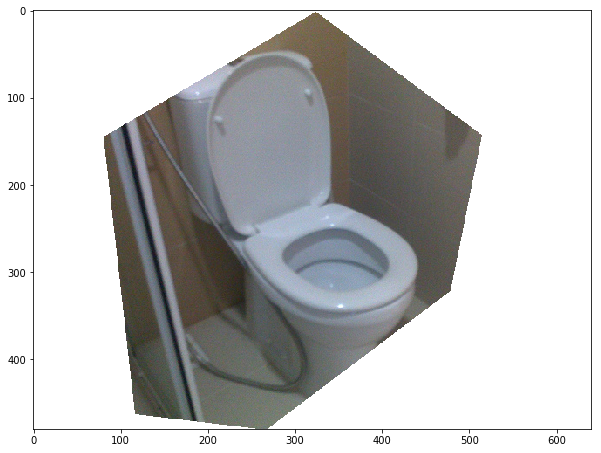

In [3]:
create_polygon()